<a href="https://colab.research.google.com/github/mobley-trent/kaggle/blob/master/mnist_%2B_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BUILDING A HANDWRITTEN DIGIT RECOGNITION MODEL WITH KERAS AND MNIST DATASET

![image](https://th.bing.com/th/id/OIP.mrR-53tNXNjlJQ7Aa5xBAQHaEe?w=305&h=184&c=7&r=0&o=5&pid=1.7)

Welcome to this Google Colab notebook where we will build a digit recognition model using the MNIST dataset from Keras. The MNIST dataset is a well-known dataset that contains a large number of 28x28 pixel grayscale images of handwritten digits from 0 to 9. We will be using Keras, a powerful open-source library for building and training deep learning models, to create a convolutional neural network (CNN) that can accurately recognize handwritten digits. We will go through the steps of loading the dataset, preparing the data, building and training our model, and evaluating its performance. By the end of this notebook, you will have a solid understanding of how to build and train a deep learning model for image recognition, which can be applied to a variety of other image recognition tasks. Let's get started!

In [1]:
# LOAD THE MNIST DATASET

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
# PREPROCESSING

# Normalizing the pixel values by dividing them by 255.
# Scales them to a range of between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
from keras.utils import np_utils

train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

# This code is using the to_categorical() function from the Keras utility 
# module to convert the integer-encoded class labels in the train_labels and 
# test_labels arrays into one-hot encoded vectors.

One-hot encoding is a common technique used to represent categorical variables as binary vectors. In this case, there are 10 possible classes (digits 0-9), so each label is represented as a 10-dimensional vector, with a 1 in the index corresponding to the class and 0s everywhere else. For example, a label of 2 would be represented as `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]` and a label of 9 would be represented as `[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]`.

In [5]:
# MODELLING

from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# COMPILING

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

This is a convolutional neural network (CNN) model, which is commonly used for image classification tasks.

The model consists of three convolutional layers with 32, 64, and 64 filters respectively, each followed by a max pooling layer. The convolutional layers use a 3x3 kernel, and the activation function used is ReLU. The max pooling layers use a 2x2 pooling window.

The output of the last pooling layer is flattened and fed into two dense layers. The first dense layer consists of 64 units with a ReLU activation function. The final dense layer consists of 10 units with a softmax activation function, which produces a probability distribution over the 10 possible output classes.

The model is compiled using the `'rmsprop'` optimizer and `'categorical_crossentropy'` loss function, which is commonly used for multiclass classification problems. The model is also set to evaluate the `'accuracy'` metric during training.

In [6]:
# TRAINING

history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 57s 59ms/step - loss: 0.1804 - accuracy: 0.9448
Epoch 2/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0484 - accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0245 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0201 - accuracy: 0.9939


In [ ]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# summarize history for accuracy
axis1.plot(history.history['accuracy'], label='Train', linewidth=3)
axis1.plot(history.history['val_accuracy'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')

# summarize history for loss
axis2.plot(history.history['loss'], label='Train', linewidth=3)
axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
plt.show()

In [7]:
# EVALUATION

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0295 - accuracy: 0.9913
Test accuracy: 0.9912999868392944


In [8]:
# PREDICTIONS

import numpy as np

predictions = model.predict(test_images)
print(np.argmax(predictions[:10], axis=1))

1/1 [==============================] - 0s 110ms/step
[7 2 1 0 4 1 4 9 5 9]


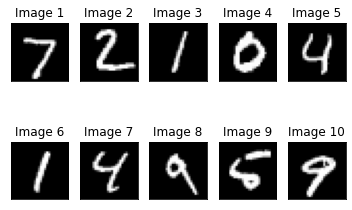

In [13]:
for i in range(10):
    plt.subplot(2, 5, i+1) # create a 2x5 grid of subplots, with index i+1
    plt.imshow(test_images[i], cmap='gray') # display the image at index i
    plt.xticks([]) # remove the x-axis ticks
    plt.yticks([]) # remove the y-axis ticks
    plt.title(f"Image {i+1}") # add a title to the subplot

plt.show() # display the plot

313/313 [==============================] - 4s 11ms/step


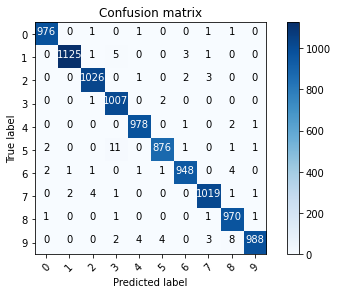

In [15]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix


Y_pred_classes = np.argmax(predictions, axis=1)
Y_true = np.argmax(test_labels, axis=1)

def plot_confusion_matrix(classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = confusion_matrix(Y_true, Y_pred_classes)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Look at confusion matrix 
plot_confusion_matrix(classes = range(10)) 